## 시각화 및 데이터 분석

2021.08.25(수)

#### 모듈 설치 (이미 설치 되어있는 경우 생략)

In [ ]:
pip install scikit-learn

In [ ]:
pip install scipy

In [ ]:
pip install numpy

In [ ]:
pip install pandas

In [ ]:
pip install matplotlib

#### 샘플링 모듈 (일반)

In [ ]:
pip install -U imbalanced-learn

#### 샘플링 모듈 (anaconda)

In [ ]:
conda install -c conda-forge imbalanced-learn

In [ ]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [ ]:
# import random undersampling and other necessary libraries 
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
import pandas as pd
df = pd.read_csv("insurancedata.csv")
print(df.shape)
print(df.head())

(7626, 17)
   Unnamed: 0 SIU_CUST_YN  SEX  AGE FP_CAREER  OCCP_GRP  TOTALPREM  \
0           0           N    2    4         N         1         14   
1           1           N    1    6         N        11          2   
2           2           N    1    5         Y         2         15   
3           3           N    1    5         N        17         13   
4           4           N    1    5         N         1          3   

   MAIN_INSR_AMT_SUM  EXPR_SUM  WORK_YEARS_MIN  EXPR_COUNT  DMND_AMT_SUM  \
0          120266433         0               0           8        141450   
1            5000000         0               1           1       1390000   
2         1797991770        22               1          24       2480000   
3          212274240         3               1           6         72320   
4           75256800         3              13           4       1300000   

   CLAIM_CNT  TOTAL_VLID_HOSP_OTDA  HOSP_VARIES  HOSP_DVSN_VARIES  \
0          4                     5        

## N : 0 / Y : 1 의 각각 비율 확인

In [ ]:
df.SIU_CUST_YN.value_counts()

N    6901
Y     725
Name: SIU_CUST_YN, dtype: int64

N    90.49305
Y     9.50695
Name: SIU_CUST_YN, dtype: float64


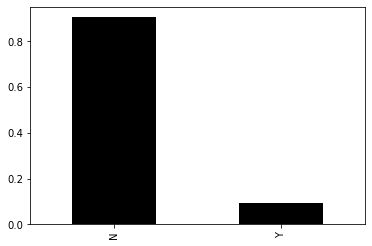

In [ ]:
df.SIU_CUST_YN.value_counts(normalize=True).plot(kind='bar', color = "black")
print(df.SIU_CUST_YN.value_counts(normalize=True)*100)

## 데이터 추가정제

데이터에 맞춰서 하나만 실행

In [ ]:
#insurance data

df['SIU_CUST_YN'].replace('N', 0, inplace = True)
df['SIU_CUST_YN'].replace('Y', 1, inplace = True)
df['FP_CAREER'].replace('N', 0, inplace = True)
df['FP_CAREER'].replace('Y', 1, inplace = True)
df.drop(['Unnamed: 0'], axis=1, inplace = True)
df.drop(['EXPR_SUM'], axis=1, inplace = True)
df.drop(['TOTALPREM'], axis=1, inplace = True)

In [ ]:
df.head()

,SIU_CUST_YN,SEX,AGE,FP_CAREER,OCCP_GRP,MAIN_INSR_AMT_SUM,WORK_YEARS_MIN,EXPR_COUNT,DMND_AMT_SUM,CLAIM_CNT,TOTAL_VLID_HOSP_OTDA,HOSP_VARIES,HOSP_DVSN_VARIES,CHME_LICE_COUNT
0,0,2,4,0,1,120266433,0,8,141450,4,5,2,2,1
1,0,1,6,0,11,5000000,1,1,1390000,3,6,3,2,3
2,0,1,5,1,2,1797991770,1,24,2480000,10,21,4,3,4
3,0,1,5,0,17,212274240,1,6,72320,1,5,1,1,1
4,0,1,5,0,1,75256800,13,4,1300000,4,26,2,2,2


In [ ]:
X = df.iloc[:,1:] # SIU_CUST_YN을 제외한 모든 cloumn
y = df.iloc[:,0] # SIU_CUST_YN

In [ ]:
# 데이터에 StartifiedKFold를 적용하기 위해서 nd.array형태로 데이터 변환
X = X.to_numpy()
print(type(X))

<class 'numpy.ndarray'>


4
TRAIN: [1899 1900 1901 ... 7623 7624 7625] TEST: [   0    1    2 ... 1940 1942 1943]
Before Sampling:  Counter({0: 5175, 1: 544})
After oversampling(ADASYN):  Counter({0: 5175, 1: 5175})
score = 0.8741478762454117
coef = [[-0.02939438 -0.38887669 -0.13391417 -0.09005704  0.49476018 -0.16098568
  -0.26586585  0.64562589 -0.64109966  3.54700253 -0.26506637  0.09928419
   0.75501098]]
x_result = [[0.88958553 0.11041447]
 [0.92668368 0.07331632]
 [0.48327677 0.51672323]
 ...
 [0.19848679 0.80151321]
 [0.71609715 0.28390285]
 [0.04941628 0.95058372]]
result
---------------------------
accuracy: 0.87
precision: 0.39
recall: 0.55
F1: 0.45


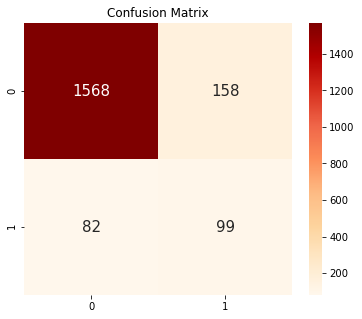

TRAIN: [   0    1    2 ... 7623 7624 7625] TEST: [1899 1900 1901 ... 4041 4054 4058]
Before Sampling:  Counter({0: 5176, 1: 543})
After oversampling(ADASYN):  Counter({0: 5176, 1: 5176})
score = 0.8930256948086
coef = [[-0.05058924 -0.40897363 -0.25578541 -0.21666294  0.3681414  -0.20934791
  -0.20783035  0.16306678 -0.98286192  3.07840601  2.17112284 -0.71412663
   0.22004846]]
x_result = [[0.89419094 0.10580906]
 [0.54749529 0.45250471]
 [0.85446874 0.14553126]
 ...
 [0.34318005 0.65681995]
 [0.28333424 0.71666576]
 [0.35864584 0.64135416]]
result
---------------------------
accuracy: 0.89
precision: 0.46
recall: 0.63
F1: 0.53


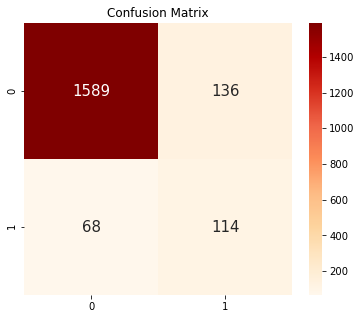

TRAIN: [   0    1    2 ... 7623 7624 7625] TEST: [3782 3783 3784 ... 5804 5815 5820]
Before Sampling:  Counter({0: 5176, 1: 544})
After oversampling(ADASYN):  Counter({0: 5176, 1: 5176})
score = 0.881427072402938
coef = [[-0.16273393 -0.39794326  0.03115112 -0.18616351  0.40474157 -0.03701032
  -0.17160866  1.22665635 -1.83675576  3.53332836 -0.21883602  0.09903424
   2.20095284]]
x_result = [[6.73086845e-01 3.26913155e-01]
 [8.07758405e-01 1.92241595e-01]
 [8.21960817e-01 1.78039183e-01]
 ...
 [3.48015426e-01 6.51984574e-01]
 [3.40152289e-06 9.99996598e-01]
 [7.86315075e-01 2.13684925e-01]]
result
---------------------------
accuracy: 0.88
precision: 0.40
recall: 0.49
F1: 0.44


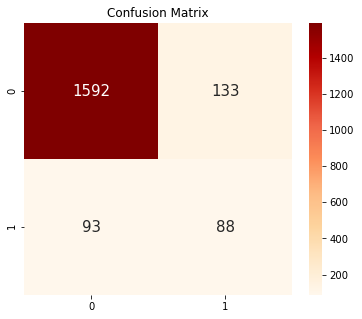

TRAIN: [   0    1    2 ... 5804 5815 5820] TEST: [5710 5711 5712 ... 7623 7624 7625]
Before Sampling:  Counter({0: 5176, 1: 544})
After oversampling(ADASYN):  Counter({0: 5176, 1: 5176})
score = 0.8835257082896117
coef = [[-0.16311453 -0.47226858  0.07496877 -0.19959817  0.39088006 -0.13072152
  -0.18871365  0.02498206 -0.91753607  4.46699177 -0.11779059 -0.01918906
   1.28720685]]
x_result = [[0.89132682 0.10867318]
 [0.92145786 0.07854214]
 [0.58924107 0.41075893]
 ...
 [0.93541785 0.06458215]
 [0.87706987 0.12293013]
 [0.18932744 0.81067256]]
result
---------------------------
accuracy: 0.88
precision: 0.41
recall: 0.53
F1: 0.46


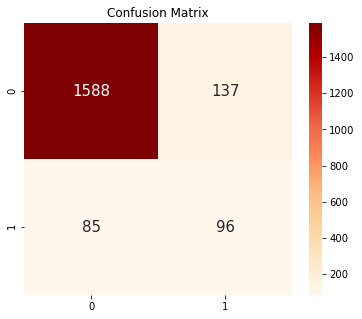

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

from collections import Counter
from imblearn.over_sampling import SVMSMOTE
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score

model = LogisticRegression()

SK_fold = StratifiedKFold(n_splits=4)
print(SK_fold.get_n_splits(df, df['SIU_CUST_YN']))

result_data = []
answers=[]
result_y = []


accuracy = []
precision = []
recall = []
fscore = []
train_idx = []
test_idx = []

for train_index, test_index in SK_fold.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    train_idx.append(train_index)
    test_idx.append(test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    #SVMSOMTE -> 오버샘플링 기법
    SVMSOMTE = SVMSMOTE()
    X_train_SVMSOMTE, y_train_SVMSOMTE = SVMSOMTE.fit_resample(X_train, y_train)
    
    print("Before Sampling: ",Counter(y_train))
    print("After oversampling(ADASYN): ",Counter(y_train_SVMSOMTE))
    
    # 해당 변수를 설정해서 Sampling 방식 선택 후 머신러닝 실행
    X_train_sampling = X_train_SVMSOMTE
    y_train_sampling = y_train_SVMSOMTE
    
    scaler = StandardScaler()
    X_train_sampling = scaler.fit_transform(X_train_sampling)
    X_test = scaler.transform(X_test)
    
    # 학습 알고리즘 예시 (LogisticRegressiong - 로지스틱 회귀분석)
    model.fit(X_train_sampling, y_train_sampling)
    
    # sklearn에서 제공하는 score값
    print('score =', model.score(X_test, y_test))
    
    # 각 속성별 가중치 -> 절대값으로 보면됨.
    print('coef =', model.coef_)
    
    print('x_result =', model.predict_proba(X_test))
    
    
    result_data.append(model.predict_proba(X_test)[:,1:])
    answers.append(y_test)
    
    predict_X = model.predict(X_test)
    result_y.append(model.predict(X_test))
    
    print('result')
    print("---------------------------")
    print('accuracy: %.2f' % accuracy_score(y_test, predict_X))
    print('precision: %.2f' % precision_score(y_test, predict_X))
    print('recall: %.2f' % recall_score(y_test, predict_X))
    print('F1: %.2f' % f1_score(y_test, predict_X))
    
    
    accuracy.append(accuracy_score(y_test, predict_X))
    precision.append(precision_score(y_test, predict_X))
    recall.append(recall_score(y_test, predict_X))
    fscore.append(f1_score(y_test, predict_X))
    
    import seaborn as sns
    confusion = confusion_matrix(y_true = y_test
                             , y_pred = predict_X)

    plt.figure(figsize=(6, 5))
    sns.heatmap(confusion, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
    plt.title('Confusion Matrix')
    plt.show()

## 교차검증 평균 값

In [ ]:
import itertools
answers = list(itertools.chain.from_iterable(answers))
result_y = list(itertools.chain.from_iterable(result_y))

In [ ]:
confusion = confusion_matrix(y_true = result_y
                             , y_pred = answers)

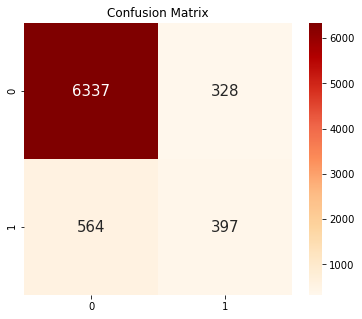

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print('mean')
print("---------------------------")
print('accuracy: %.2f' % (sum(accuracy)/len(accuracy)))
print('precision: %.2f' % (sum(precision)/len(precision)))
print('recall: %.2f' % (sum(recall)/len(recall)))
print('F1: %.2f' % (sum(fscore)/len(fscore)))

mean
---------------------------
accuracy: 0.88
precision: 0.41
recall: 0.55
F1: 0.47


## 데이터 확인 및 정제

In [ ]:
result_data = list(itertools.chain.from_iterable(result_data))
result_data = list(map(float, result_data))

In [ ]:
# datas => 정답여부 
# test_idx => test_index의 index number
# answers => y_test(정답)
# result_data => train 후 test_X를 활용해 예측된 결과값

datas = []
for i in range(len(answers)):
    if answers[i] == 1:
        if result_data[i] >=0.5:
            datas.append(1)
        else :
            datas.append(0)
            
    elif answers[i] == 0:
        if result_data[i] <0.5:
            datas.append(1)
        else :
            datas.append(0)
        

In [ ]:
status = []
for i in range(len(answers)):
    if result_data[i] <0.5:
        status.append('주의')
    elif result_data[i] <0.7:
        status.append('경계')
    else:
        status.append('위험')
            

In [ ]:
print(len(answers), len(result_data), len(datas), len(status))

7626 7626 7626 7626


In [ ]:
print(type(answers), type(answers[0]))
print(type(result_data), type(result_data[0]))
print(type(datas), type(datas[0]))
print(type(status), type(status[0]))

<class 'list'> <class 'int'>
<class 'list'> <class 'float'>
<class 'list'> <class 'int'>
<class 'list'> <class 'str'>


In [ ]:
df_result = pd.DataFrame({'answers':answers,'result_data':result_data,'datas':datas, 'status':status})

In [ ]:
df_result
# column 조치사항 result_data(예측 확률) 기준'주의'(0.0~0.5),'경계'(0.5~0.7),'위험'(0,7~1.0)

,answers,result_data,datas,status
0,0,0.110414,1,주의
1,0,0.073316,1,주의
2,0,0.516723,0,경계
3,0,0.091033,1,주의
4,0,0.111435,1,주의
...,...,...,...,...
7621,0,0.146864,1,주의
7622,0,0.133251,1,주의
7623,0,0.064582,1,주의
7624,0,0.122930,1,주의


In [ ]:
df_result.to_csv('result.csv')

## 결과 데이터 정제

In [ ]:
y1 = np.array([0 for i in range(10)])
# result_data(예측된 확률값)을 기준으로 0~0.1/0.1~0.2/0.2~0.3/.../0.9~1.0으로 총 10가지로 분류
# datas(정답여부)를 기준으로 정답인 데이터들만 추가함. 
count = 0
for i in df_result['datas']:
    if i==1 and df_result['result_data'][count] < 0.1 :
        y1[0] +=1
    elif i==1 and df_result['result_data'][count] < 0.2 :
        y1[1] +=1
    elif i==1 and df_result['result_data'][count] < 0.3 :
        y1[2] +=1
    elif i==1 and df_result['result_data'][count] < 0.4 :
        y1[3] +=1
    elif i==1 and df_result['result_data'][count] < 0.5 :
        y1[4] +=1
    elif i==1 and df_result['result_data'][count] < 0.6 :
        y1[5] +=1
    elif i==1 and df_result['result_data'][count] < 0.7 :
        y1[6] +=1
    elif i==1 and df_result['result_data'][count] < 0.8 :
        y1[7] +=1
    elif i==1 and df_result['result_data'][count] < 0.9 :
        y1[8] +=1
    elif i==1 and df_result['result_data'][count] <= 1 :
        y1[9] +=1
    count+=1

In [ ]:
y3 = np.array([0 for i in range(10)])
# result_data(예측된 확률값)을 기준으로 0~0.1/0.1~0.2/0.2~0.3/.../0.9~1.0으로 총 10가지로 분류
# datas(정답여부)를 기준으로 오답인 데이터들만 추가함. 
count = 0
for i in df_result['datas']:
    if i==0 and df_result['result_data'][count] < 0.1 :
        y3[0] +=1
    elif i==0 and df_result['result_data'][count] < 0.2 :
        y3[1] +=1
    elif i==0 and df_result['result_data'][count] < 0.3 :
        y3[2] +=1
    elif i==0 and df_result['result_data'][count] < 0.4 :
        y3[3] +=1
    elif i==0 and df_result['result_data'][count] < 0.5 :
        y3[4] +=1
    elif i==0 and df_result['result_data'][count] < 0.6 :
        y3[5] +=1
    elif i==0 and df_result['result_data'][count] < 0.7 :
        y3[6] +=1
    elif i==0 and df_result['result_data'][count] < 0.8 :
        y3[7] +=1
    elif i==0 and df_result['result_data'][count] < 0.9 :
        y3[8] +=1
    elif i==0 and df_result['result_data'][count] <= 1 :
        y3[9] +=1
    count+=1

In [ ]:
y2 =  np.array([0 for i in range(10)])
# result_data(예측된 확률값)을 기준으로 0~0.1/0.1~0.2/0.2~0.3/.../0.9~1.0으로 총 10가지로 분류
# datas(정답여부)와 상관없이 모든 데이터를 추가함 
for count in range(len(df_result['result_data'])):
    if df_result['result_data'][count] < 0.1 :
        y2[0] +=1
    elif df_result['result_data'][count] < 0.2 :
        y2[1] +=1
    elif df_result['result_data'][count] < 0.3 :
        y2[2] +=1
    elif df_result['result_data'][count] < 0.4 :
        y2[3]+=1
    elif df_result['result_data'][count] < 0.5 :
        y2[4] +=1
    elif df_result['result_data'][count] < 0.6 :
        y2[5] +=1
    elif df_result['result_data'][count] < 0.7 :
        y2[6] +=1
    elif df_result['result_data'][count] < 0.8 :
        y2[7] +=1
    elif df_result['result_data'][count] < 0.9 :
        y2[8] +=1
    elif df_result['result_data'][count] <= 1:
        y2[9] +=1

In [ ]:
df = pd.DataFrame({'correct':y1,'all':y2,'wrong':y3})
# 정답, 전체, 오답 순

In [ ]:
print(df)

   correct   all  wrong
0     2128  2186     58
1     2817  2923    106
2      866   934     68
3      352   399     47
4      174   223     49
5       33   181    148
6       37   148    111
7       41   130     89
8       47   119     72
9      239   383    144


## 데이터 시각화

In [ ]:
x =  np.array([i for i in range(10)])

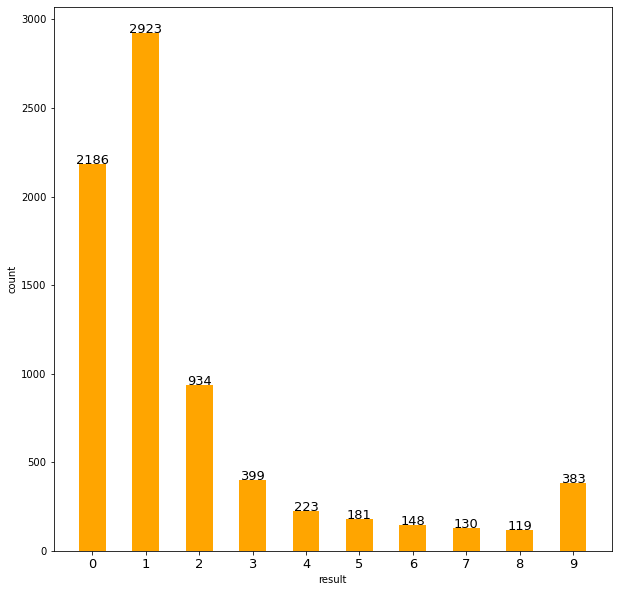

In [ ]:
# 예측한 전체 데이터 갯수

tick_size = 13 ## 눈금 폰트 사이즈
axis_label_size = 15 ## x축, y축 폰트 사이즈

fig = plt.figure(figsize=(10,10)) ## Figure 생성 사이즈는 10 by 10
ax = fig.add_subplot() ## Axes 추가
bars = plt.bar(x,y2, width=0.5, color = 'orange')
plt.xlabel('result')
plt.ylabel('count')

for i, b in enumerate(bars):
    ax.text(b.get_x()+b.get_width()*(1/2),b.get_height()+0.1, \
                y2[i],ha='center',fontsize=13)
xtick_label_position = list(range(len(x)))
plt.xticks(xtick_label_position, x, fontsize=tick_size)

plt.show()

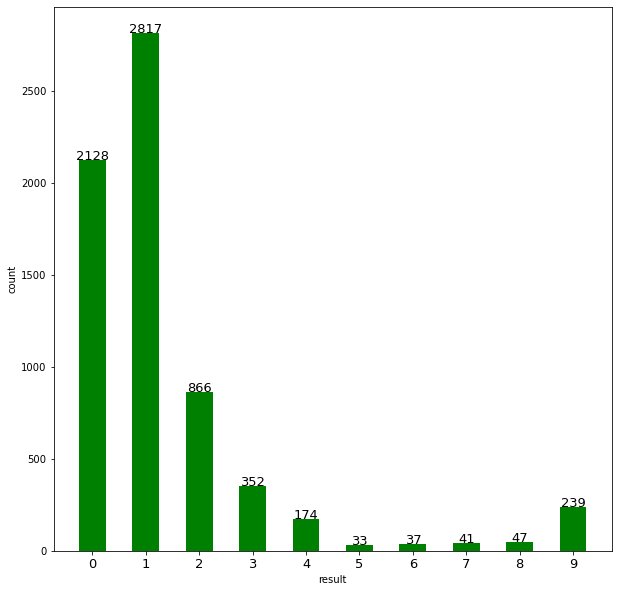

In [ ]:
# 정답 갯수

tick_size = 13 ## 눈금 폰트 사이즈
axis_label_size = 15 ## x축, y축 폰트 사이즈

fig = plt.figure(figsize=(10,10)) ## Figure 생성 사이즈는 10 by 10
ax = fig.add_subplot() ## Axes 추가
bars = plt.bar(x,y1, width=0.5, color ='green')
plt.xlabel('result')
plt.ylabel('count')

for i, b in enumerate(bars):
    ax.text(b.get_x()+b.get_width()*(1/2),b.get_height()+0.1, \
                y1[i],ha='center',fontsize=13)
xtick_label_position = list(range(len(x)))
plt.xticks(xtick_label_position, x, fontsize=tick_size)

plt.show()

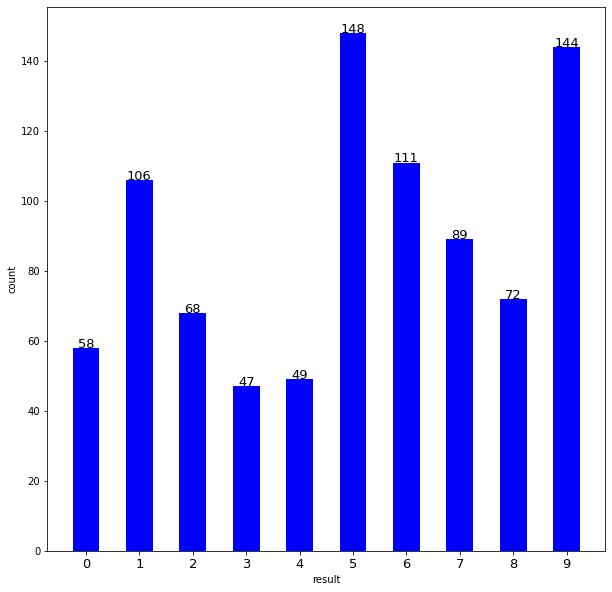

In [ ]:
# 오답 갯수

tick_size = 13 ## 눈금 폰트 사이즈
axis_label_size = 15 ## x축, y축 폰트 사이즈

fig = plt.figure(figsize=(10,10)) ## Figure 생성 사이즈는 10 by 10
ax = fig.add_subplot() ## Axes 추가
bars = plt.bar(x,y3, width=0.5, color ='blue')
plt.xlabel('result')
plt.ylabel('count')

for i, b in enumerate(bars):
    ax.text(b.get_x()+b.get_width()*(1/2),b.get_height()+0.1, \
                y3[i],ha='center',fontsize=13)
xtick_label_position = list(range(len(x)))
plt.xticks(xtick_label_position, x, fontsize=tick_size)

plt.show()

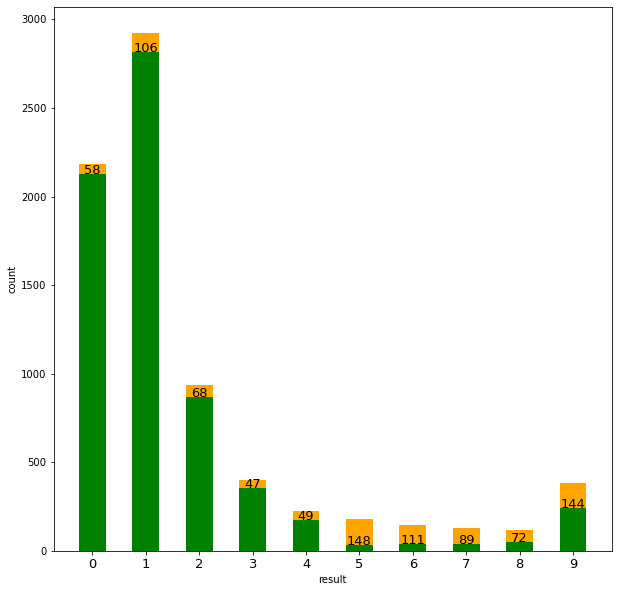

In [ ]:
import matplotlib.pyplot as plt
# 주황으로 보이는 부분(+숫자)이 오답이라고 생각하면 됨.

tick_size = 13 ## 눈금 폰트 사이즈
axis_label_size = 15 ## x축, y축 폰트 사이즈

fig = plt.figure(figsize=(10,10)) ## Figure 생성 사이즈는 10 by 10
ax = fig.add_subplot() ## Axes 추가
bars = plt.bar(x,y2, width=0.5, color = 'orange')
bars2 = plt.bar(x,y1, width=0.5, color ='green')
plt.xlabel('result')
plt.ylabel('count')

for i, b in enumerate(bars2):
    ax.text(b.get_x()+b.get_width()*(1/2),b.get_height()+0.1, \
                y2[i]-y1[i],ha='center',fontsize=13)
    
xtick_label_position = list(range(len(x)))
plt.xticks(xtick_label_position, x, fontsize=tick_size)

plt.show()

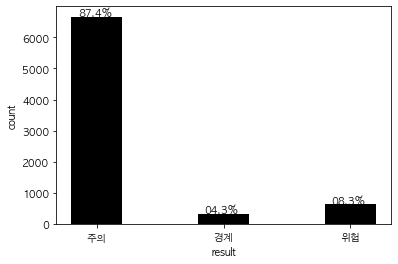

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
rc('font', family='AppleGothic')

# 주황으로 보이는 부분이 오답이라고 생각하면 됨.
bins = np.arange(4) - 0.5
ys, xs, patches = plt.hist(df_result['status'], color = 'black',bins=bins, rwidth=0.4,)
for i in range(0, len(ys)):
    ## 앞에서 plt.hist 가 리턴하는 값이 bar의 x, y좌표이기 때문에 
    ## 이 값을 이용해서 글자를 어디에 넣을지 결정해줌. 
    plt.text(x=xs[i]+0.35, y=ys[i]+0.015, 
             s='{:0>4.1f}%'.format(ys[i]/len(df_result)*100), ## 넣을 스트링
             fontsize=10,## 크기 
             color='black',)
plt.xlabel('result')
plt.xticks(['주의','경계','위험'])
plt.ylabel('count')
plt.show()
